In [3]:
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, median_absolute_error
import math
from sklearn.metrics import mean_absolute_error

In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
Tvt = pd.read_csv("E:/TVTODAY.NS.csv", index_col='Date', parse_dates=['Date'])
Tvt.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-10-12,271.000000,278.799988,266.600006,267.700012,241.180099,247448
2015-10-13,269.100006,276.500000,267.500000,268.899994,242.261215,200947
2015-10-14,269.500000,273.250000,261.000000,263.100006,237.035843,270376
2015-10-15,265.350006,269.000000,261.200012,265.600006,239.288193,244544
2015-10-16,265.500000,270.500000,262.100006,263.649994,237.531372,192816


In [5]:
Tvt.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

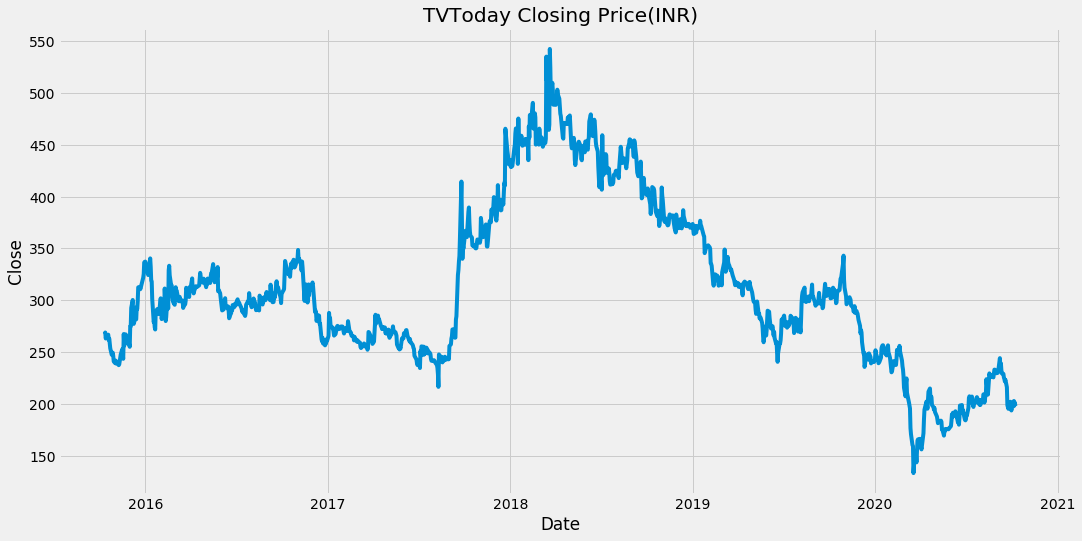

In [6]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(Tvt['Close'])
plt.title('TVToday Closing Price(INR)')
plt.show()

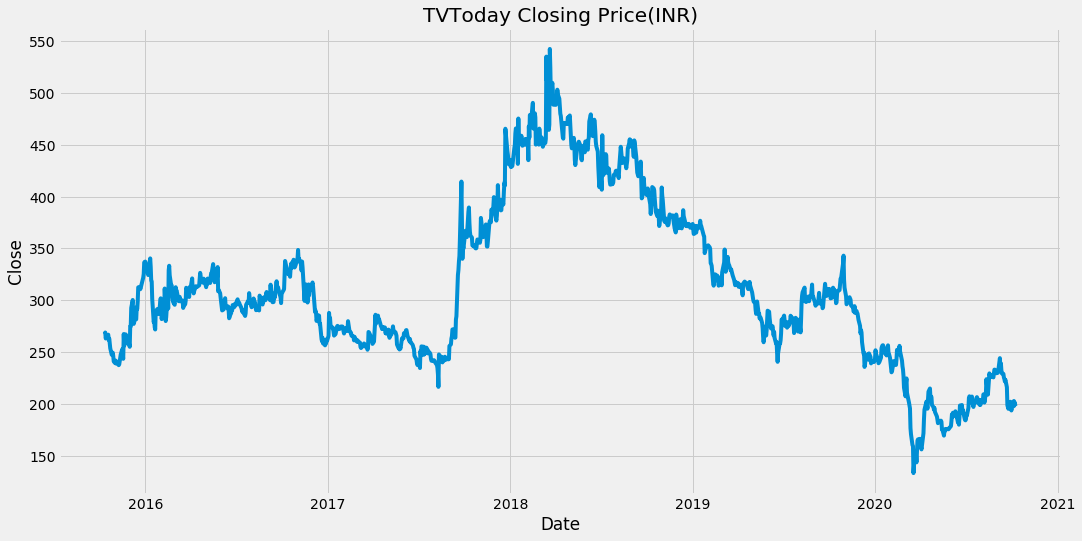

In [7]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(Tvt['Close'])
plt.title('TVToday Closing Price(INR)')
plt.show()

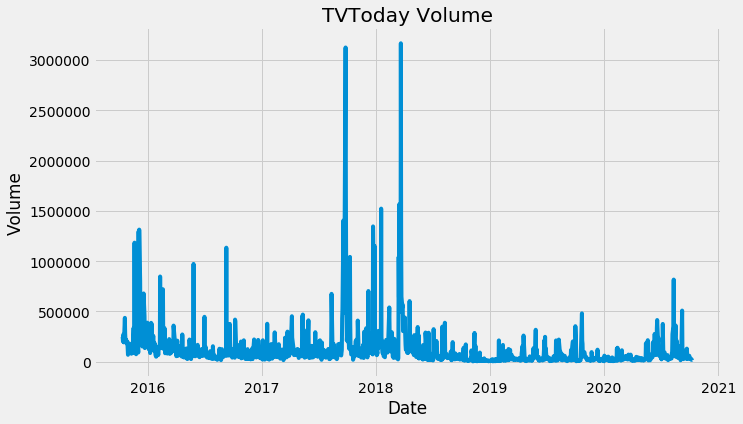

In [8]:
plt.xlabel('Date')
plt.ylabel('Volume')
plt.plot(Tvt['Volume'])
plt.title('TVToday Volume')
plt.show()

CLOSE PRICE PREDICTION

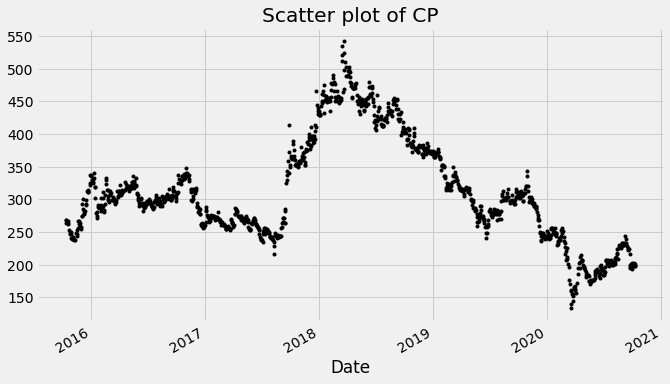

In [9]:
dt_close = Tvt['Close']
dt_close.plot(style='k.')
plt.title('Scatter plot of CP')
plt.show()

In [10]:
def test_stationarity(timeseries):
    rolmean  = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print('Results of fuller test')
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4], index=['Test Statistics', 'p-value', 'No. of lags used', 'Number of observations used'])
    for key,values in adft[4].items():
        output['Critical value (%s)'%key] = values
    print(output)

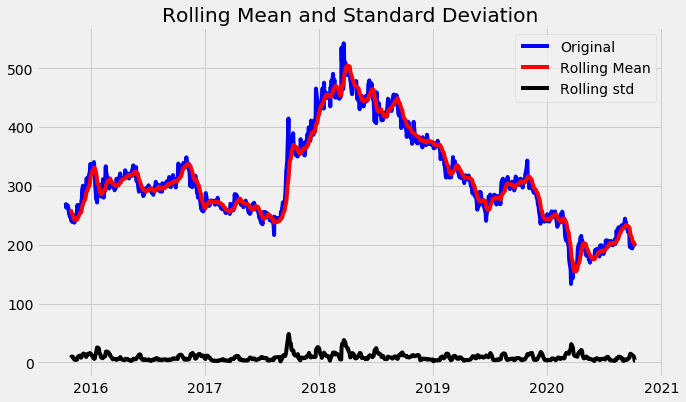

Results of fuller test
Test Statistics                  -1.166130
p-value                           0.687993
No. of lags used                  3.000000
Number of observations used    1226.000000
Critical value (1%)              -3.435695
Critical value (5%)              -2.863900
Critical value (10%)             -2.568027
dtype: float64


<Figure size 720x432 with 0 Axes>

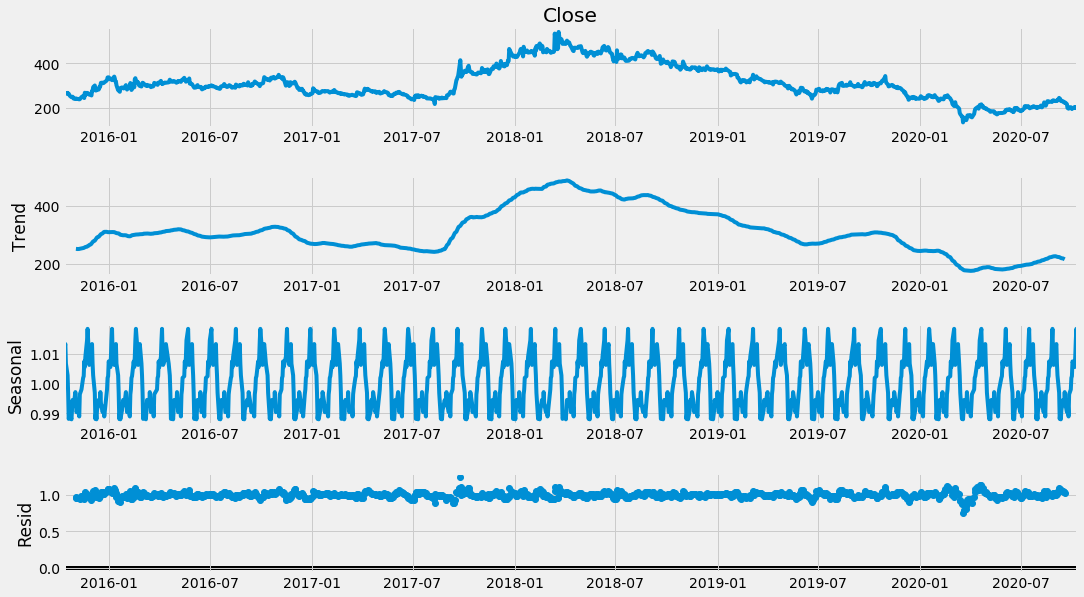

In [11]:
test_stationarity(dt_close)
result = seasonal_decompose(dt_close, model='multiplicative', freq = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)
plt.show()

No handles with labels found to put in legend.


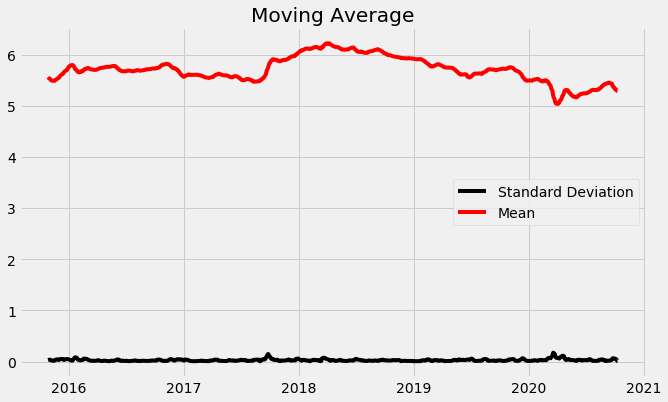

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
dt_log = np.log(dt_close)
moving_avg = dt_log.rolling(12).mean()
std_dev = dt_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color='black', label = "Standard Deviation")
plt.plot(moving_avg, color='red', label = "Mean")
plt.legend()
plt.show()

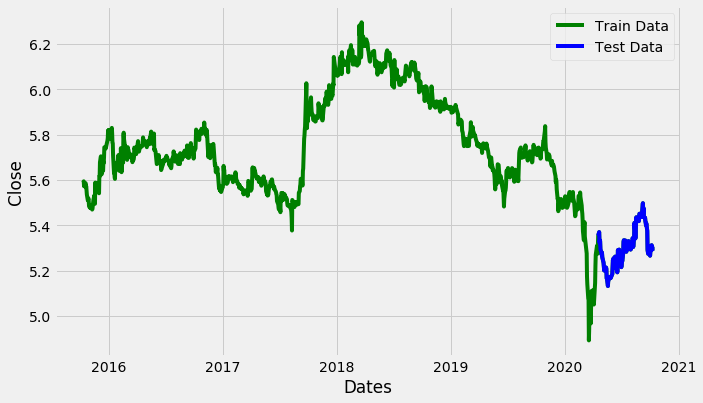

In [13]:
train_data, test_data = dt_log[3:int(len(dt_log)*0.9)], dt_log[int(len(dt_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close')
plt.plot(dt_log, 'green', label='Train Data')
plt.plot(test_data, 'blue', label='Test Data')
plt.legend()
plt.show()

In [14]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                             test='adf',
                             max_p=3, max_q=3,
                             m=1,
                             d=None,
                             seasonal=False,
                             start_P=0,
                             D=0,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)
print(model_autoARIMA.summary())

Fit ARIMA: order=(0, 1, 0); AIC=-4859.324, BIC=-4849.313, Fit time=0.396 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-4861.115, BIC=-4846.098, Fit time=0.068 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-4861.921, BIC=-4846.904, Fit time=0.125 seconds
Fit ARIMA: order=(1, 1, 1); AIC=-4863.305, BIC=-4843.281, Fit time=0.182 seconds
Fit ARIMA: order=(1, 1, 2); AIC=-4865.908, BIC=-4840.879, Fit time=0.335 seconds
Fit ARIMA: order=(2, 1, 3); AIC=-4872.794, BIC=-4837.754, Fit time=1.082 seconds
Fit ARIMA: order=(1, 1, 3); AIC=-4864.623, BIC=-4834.589, Fit time=0.444 seconds
Fit ARIMA: order=(3, 1, 3); AIC=-4871.425, BIC=-4831.378, Fit time=2.529 seconds
Fit ARIMA: order=(2, 1, 2); AIC=-4865.026, BIC=-4834.992, Fit time=0.425 seconds
Total fit time: 5.595 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1103
Model:                 ARIMA(2, 1, 3)   Log Likelihood                2443.397
Meth

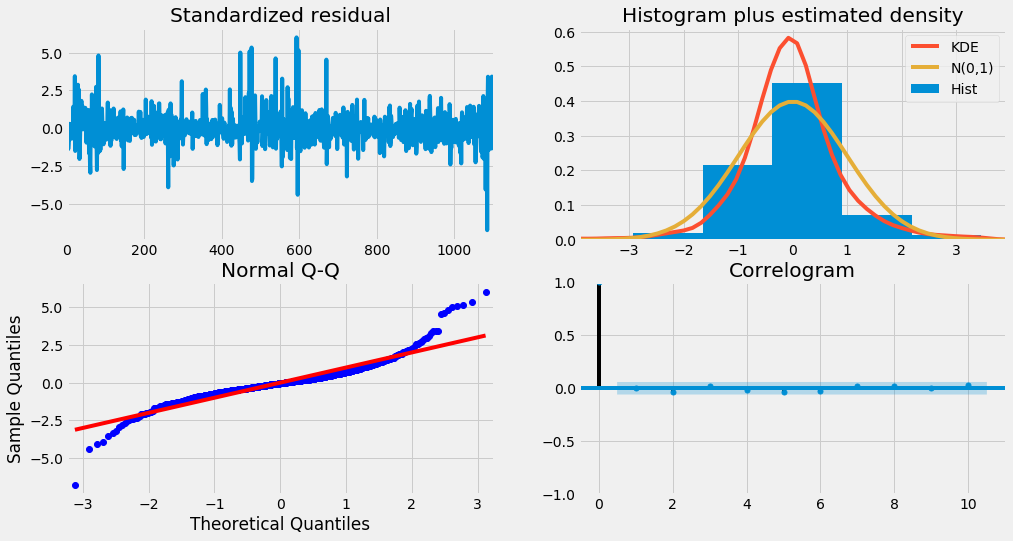

In [15]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [18]:
model = ARIMA(train_data, order=(3,1,2))
fitted = model.fit(disp=-1)
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1103
Model:                 ARIMA(3, 1, 2)   Log Likelihood                2438.404
Method:                       css-mle   S.D. of innovations              0.027
Date:                Tue, 13 Oct 2020   AIC                          -4862.809
Time:                        22:00:06   BIC                          -4827.768
Sample:                             1   HQIC                         -4849.555
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0002      0.001     -0.321      0.748      -0.002       0.001
ar.L1.D.Close     0.6950      0.632      1.100      0.271      -0.543       1.933
ar.L2.D.Close    -0.0716      0.284     

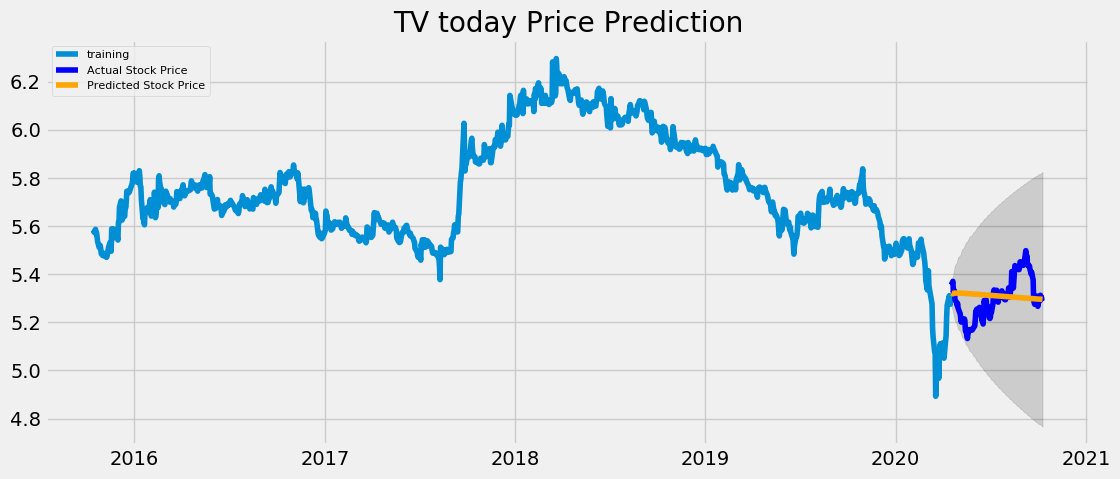

In [19]:
fc, se, conf = fitted.forecast(123, alpha=0.05)
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color='blue', label='Actual Stock Price')
plt.plot(fc_series, color='orange', label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('TV today Price Prediction')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

In [21]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))
    me = np.mean(forecast - actual)
    mae = np.mean(np.abs(forecast - actual))
    mpe = np.mean((forecast - actual)/actual)
    rmse = np.mean((forecast - actual)**2)**.5
    corr = np.corrcoef(forecast, actual)[0,1]
    mins = np.amin(np.hstack([forecast[:,None],
                             actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                             actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)
    acf1 = acf(fc-test_data)[1]
    return({'mape':mape, 'me':me, 'mae': mae, 'mpe': mpe, 'rmse': rmse, 'acf1': acf1, 'corr': corr, 'minmax': minmax})
forecast_accuracy(fc, test_data.values)

{'mape': 0.013924037494345972,
 'me': 0.00557276974365002,
 'mae': 0.07387394105735556,
 'mpe': 0.0013301694072847992,
 'rmse': 0.09187505464150188,
 'acf1': 0.9634596011975226,
 'corr': -0.6680782948202346,
 'minmax': 0.013768237905713021}

In [22]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [23]:
df = pd.read_csv("E:\TVTODAY.NS.csv", header=0)

model = pm.auto_arima(df.Close, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 1, 1); AIC=8778.900, BIC=8799.356, Fit time=0.174 seconds
Fit ARIMA: order=(0, 1, 0); AIC=8808.666, BIC=8818.894, Fit time=0.000 seconds
Fit ARIMA: order=(1, 1, 0); AIC=8794.212, BIC=8809.554, Fit time=0.031 seconds
Fit ARIMA: order=(0, 1, 1); AIC=8789.124, BIC=8804.466, Fit time=0.018 seconds
Fit ARIMA: order=(2, 1, 1); AIC=8777.280, BIC=8802.850, Fit time=0.131 seconds
Fit ARIMA: order=(2, 1, 0); AIC=8778.073, BIC=8798.528, Fit time=0.059 seconds
Fit ARIMA: order=(2, 1, 2); AIC=8779.246, BIC=8809.930, Fit time=0.285 seconds
Fit ARIMA: order=(3, 1, 2); AIC=8779.715, BIC=8815.513, Fit time=0.898 seconds
Fit ARIMA: order=(3, 1, 1); AIC=8779.157, BIC=8809.841, Fit time=0.225 seconds
Total fit time: 1.829 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1229
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -4383.640
Method:               

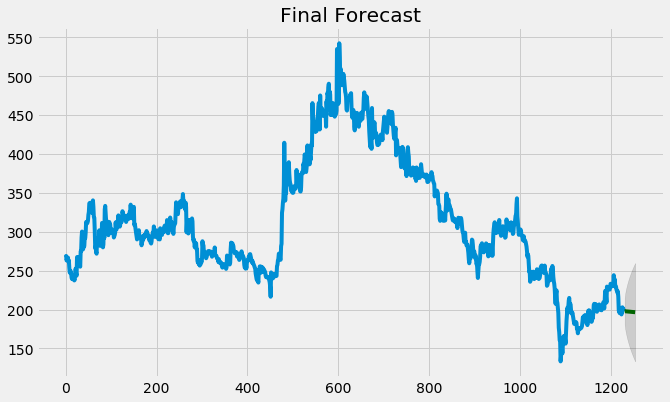

In [24]:
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.Close), len(df.Close)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.Close)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast")
plt.show()

In [42]:
fc_series

1230    197.755483
1231    197.807378
1232    197.738332
1233    197.670223
1234    197.612464
1235    197.556730
1236    197.500537
1237    197.444081
1238    197.387610
1239    197.331158
1240    197.274711
1241    197.218264
1242    197.161816
1243    197.105368
1244    197.048920
1245    196.992472
1246    196.936024
1247    196.879576
1248    196.823129
1249    196.766681
1250    196.710233
1251    196.653785
1252    196.597337
1253    196.540889
dtype: float64

OPEN PRICE PREDICTION

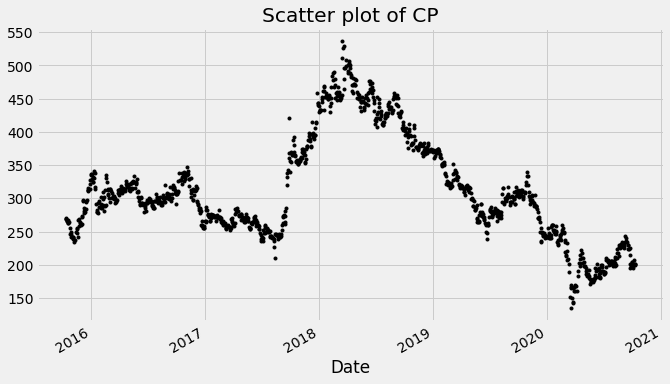

In [44]:
dt_Open = Tvt['Open']
dt_Open.plot(style='k.')
plt.title('Scatter plot of CP')
plt.show()

In [45]:
def test_stationarity(timeseries):
    rolmean  = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print('Results of fuller test')
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4], index=['Test Statistics', 'p-value', 'No. of lags used', 'Number of observations used'])
    for key,values in adft[4].items():
        output['Critical value (%s)'%key] = values
    print(output)

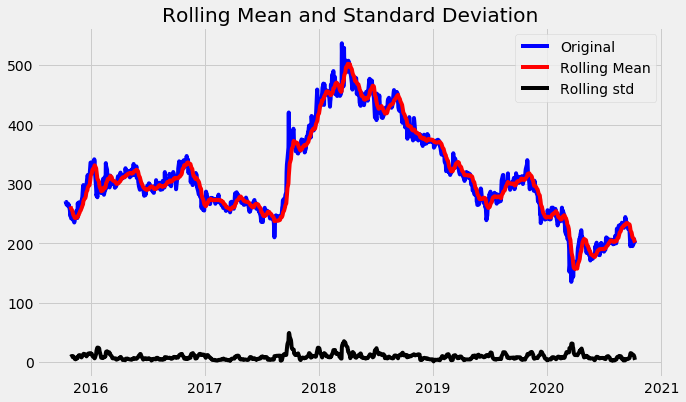

Results of fuller test
Test Statistics                  -1.195193
p-value                           0.675660
No. of lags used                  3.000000
Number of observations used    1226.000000
Critical value (1%)              -3.435695
Critical value (5%)              -2.863900
Critical value (10%)             -2.568027
dtype: float64


<Figure size 720x432 with 0 Axes>

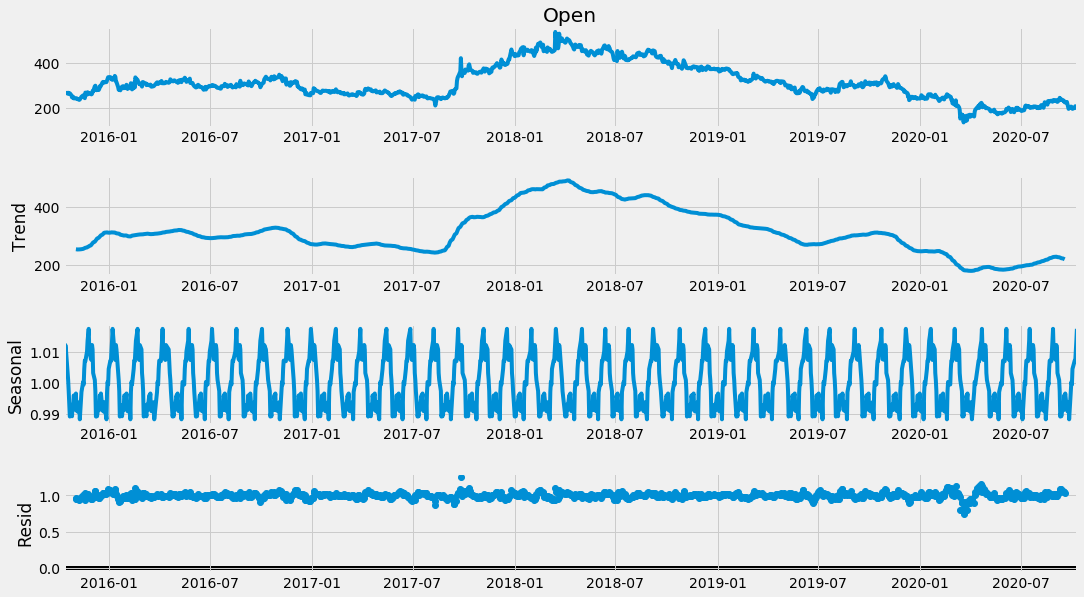

In [46]:
test_stationarity(dt_Open)
result = seasonal_decompose(dt_Open, model='multiplicative', freq = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)
plt.show()

No handles with labels found to put in legend.


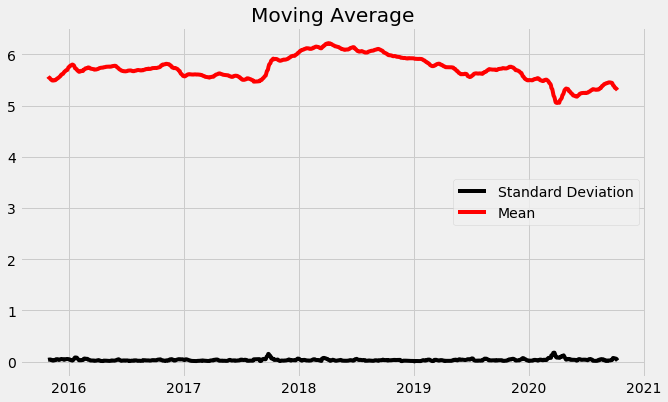

In [47]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
dt_log = np.log(dt_Open)
moving_avg = dt_log.rolling(12).mean()
std_dev = dt_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color='black', label = "Standard Deviation")
plt.plot(moving_avg, color='red', label = "Mean")
plt.legend()
plt.show()

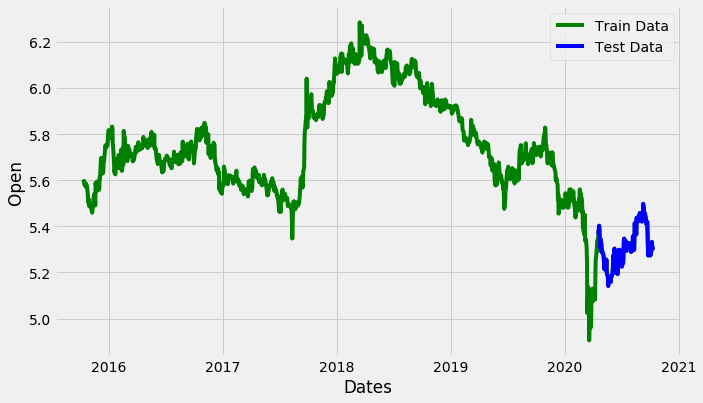

In [48]:
train_data, test_data = dt_log[3:int(len(dt_log)*0.9)], dt_log[int(len(dt_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open')
plt.plot(dt_log, 'green', label='Train Data')
plt.plot(test_data, 'blue', label='Test Data')
plt.legend()
plt.show()

In [49]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                             test='adf',
                             max_p=3, max_q=3,
                             m=1,
                             d=None,
                             seasonal=False,
                             start_P=0,
                             D=0,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)
print(model_autoARIMA.summary())

Fit ARIMA: order=(0, 1, 0); AIC=-4613.639, BIC=-4603.628, Fit time=0.810 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-4651.951, BIC=-4636.934, Fit time=0.376 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-4653.218, BIC=-4638.201, Fit time=0.328 seconds
Fit ARIMA: order=(1, 1, 1); AIC=-4651.269, BIC=-4631.246, Fit time=0.596 seconds
Fit ARIMA: order=(0, 1, 2); AIC=-4651.249, BIC=-4631.226, Fit time=0.304 seconds
Fit ARIMA: order=(1, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 3.606 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1103
Model:                 ARIMA(0, 1, 1)   Log Likelihood                2329.609
Method:                       css-mle   S.D. of innovations              0.029
Date:                Tue, 13 Oct 2020   AIC                          -4653.218
Time:                        12:52:26   BIC                          -4638.201
Sample:                 

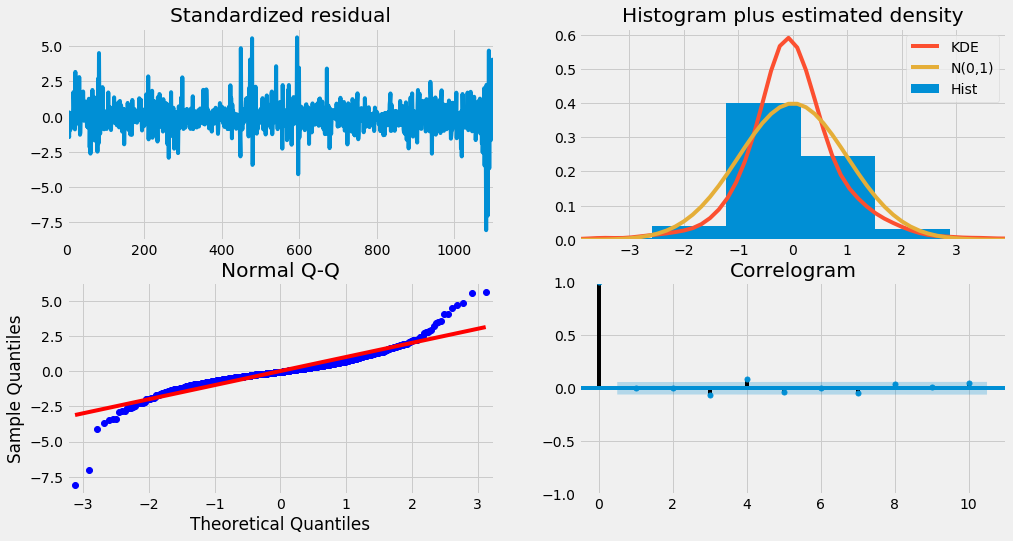

In [50]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [51]:
model = ARIMA(train_data, order=(3,1,2))
fitted = model.fit(disp=-1)
print(fitted.summary())

E:\Punita Trivedi\Ana\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Punita Trivedi\Ana\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Open   No. Observations:                 1103
Model:                 ARIMA(3, 1, 2)   Log Likelihood                2336.795
Method:                       css-mle   S.D. of innovations              0.029
Date:                Tue, 13 Oct 2020   AIC                          -4659.589
Time:                        12:53:04   BIC                          -4624.549
Sample:                             1   HQIC                         -4646.335
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0003      0.001     -0.371      0.711      -0.002       0.001
ar.L1.D.Open    -0.9032      0.264     -3.427      0.001      -1.420      -0.387
ar.L2.D.Open    -0.2569      0.259     -0.99

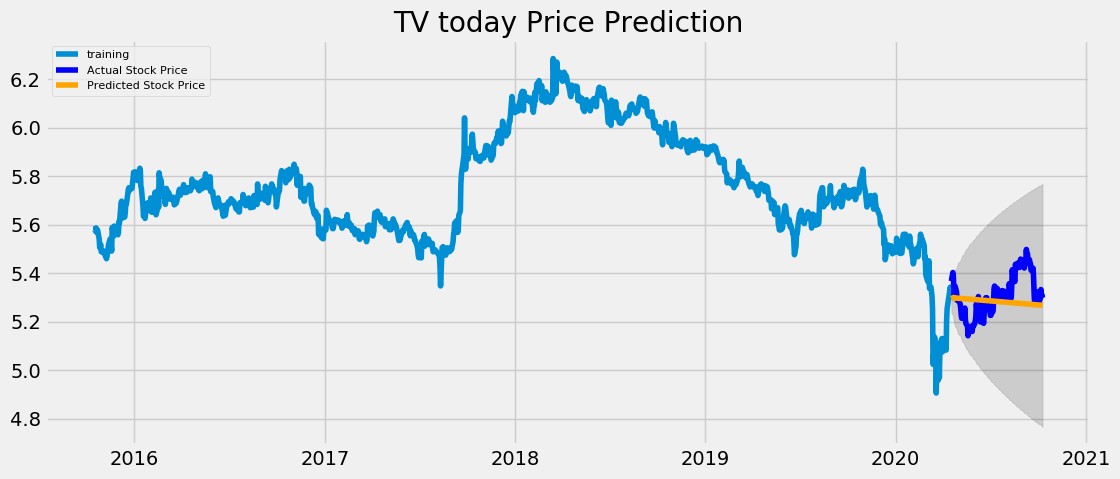

In [53]:
fc, se, conf = fitted.forecast(123, alpha=0.05)
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color='blue', label='Actual Stock Price')
plt.plot(fc_series, color='orange', label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('TV today Price Prediction')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [55]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))
    me = np.mean(forecast - actual)
    mae = np.mean(np.abs(forecast - actual))
    mpe = np.mean((forecast - actual)/actual)
    rmse = np.mean((forecast - actual)**2)**.5
    corr = np.corrcoef(forecast, actual)[0,1]
    mins = np.amin(np.hstack([forecast[:,None],
                             actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                             actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)
    acf1 = acf(fc-test_data)[1]
    return({'mape':mape, 'me':me, 'mae': mae, 'mpe': mpe, 'rmse': rmse, 'acf1': acf1, 'corr': corr, 'minmax': minmax})
forecast_accuracy(fc, test_data.values)

{'mape': 0.014460482118599901,
 'me': -0.029489661663854184,
 'mae': 0.07725928024020295,
 'mpe': -0.0052775663558014135,
 'rmse': 0.09594782627623442,
 'acf1': 0.9489935945642083,
 'corr': -0.6155897868903427,
 'minmax': 0.014382958714349914}

In [56]:
df = pd.read_csv("E:\TVTODAY.NS.csv", header=0)

model = pm.auto_arima(df.Open, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 1, 1); AIC=8875.025, BIC=8895.481, Fit time=0.310 seconds
Fit ARIMA: order=(0, 1, 0); AIC=8921.365, BIC=8931.593, Fit time=0.008 seconds
Fit ARIMA: order=(1, 1, 0); AIC=8886.224, BIC=8901.566, Fit time=0.032 seconds
Fit ARIMA: order=(0, 1, 1); AIC=8879.134, BIC=8894.476, Fit time=0.032 seconds
Fit ARIMA: order=(2, 1, 1); AIC=8876.972, BIC=8902.542, Fit time=0.256 seconds
Fit ARIMA: order=(1, 1, 2); AIC=8876.982, BIC=8902.552, Fit time=0.344 seconds
Fit ARIMA: order=(2, 1, 2); AIC=8878.909, BIC=8909.593, Fit time=0.393 seconds
Total fit time: 1.400 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1229
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4433.513
Method:                       css-mle   S.D. of innovations              8.921
Date:                Tue, 13 Oct 2020   AIC                           8875.025
Time:                 

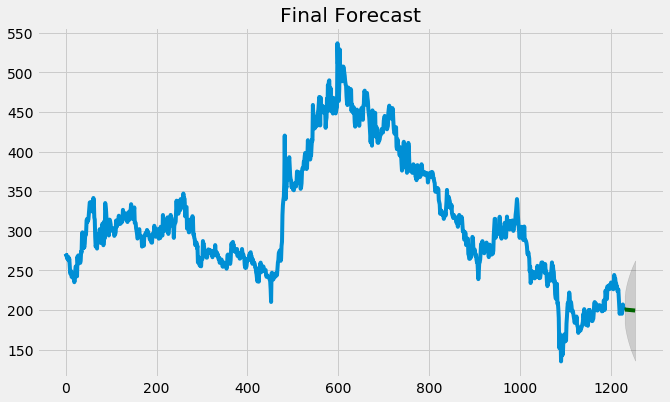

In [67]:
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.Open), len(df.Open)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.Open)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast")
plt.show()

In [68]:
fc_series

1230    200.361536
1231    200.434287
1232    200.417678
1233    200.373419
1234    200.320604
1235    200.265141
1236    200.208859
1237    200.152324
1238    200.095710
1239    200.039072
1240    199.982426
1241    199.925778
1242    199.869130
1243    199.812481
1244    199.755832
1245    199.699183
1246    199.642534
1247    199.585885
1248    199.529236
1249    199.472587
1250    199.415938
1251    199.359289
1252    199.302640
1253    199.245991
dtype: float64

Technical Analysis

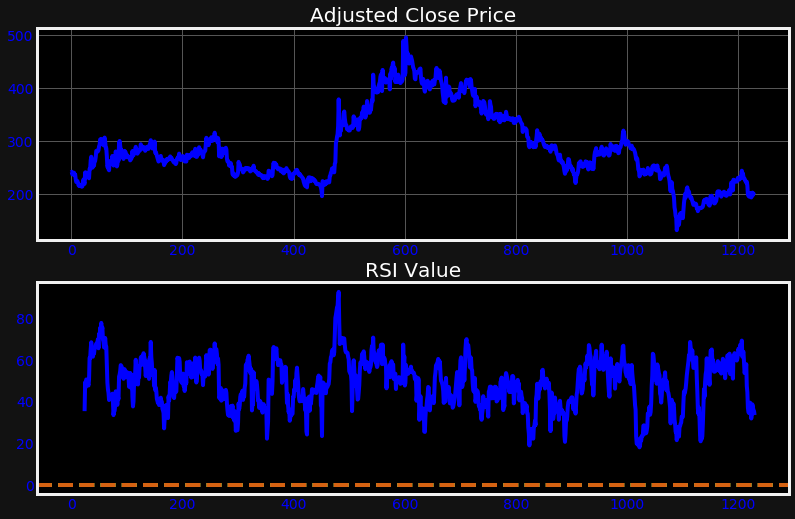

In [65]:
import datetime as dt

data = pd.read_csv("E:/TVTODAY.NS.csv")

tv = data["Adj Close"].diff(1)
tv.dropna(inplace=True)

positive = tv.copy()
negative = tv.copy()

positive[positive < 0] = 0
negative[negative > 0] = 0

days = 24

average_gain = positive.rolling(window=days).mean()
average_loss = abs(negative.rolling(window=days).mean())

relative_strength = average_gain / average_loss
RSI = 100.0 - (100.0 / (1.0 + relative_strength))

combined = pd.DataFrame()
combined["Adj Close"] = data["Adj Close"]
combined['RSI'] = RSI

plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
ax1.plot(combined.index, combined["Adj Close"], color="blue")
ax1.set_title("Adjusted Close Price", color='white')

ax1.grid(True, color="#555555")
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', colors='blue')
ax1.tick_params(axis='y', colors='blue')

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(combined.index, combined['RSI'], color='blue')
ax2.axhline(0, linestyle='--', alpha=0.5, color='#ff0000')
ax2.axhline(0, linestyle='--', alpha=0.5, color='#ffaa00')
ax2.axhline(0, linestyle='--', alpha=0.5, color='#00ff00')
ax2.axhline(0, linestyle='--', alpha=0.5, color='#cccccc')
ax2.axhline(0, linestyle='--', alpha=0.5, color='#cccccc')
ax2.axhline(0, linestyle='--', alpha=0.5, color='#00ff00')
ax2.axhline(0, linestyle='--', alpha=0.5, color='#ffaa00')
ax2.axhline(0, linestyle='--', alpha=0.5, color='#ff0000')

ax2.set_title("RSI Value", color='white')
ax2.grid(False)
ax2.set_axisbelow(True)
ax2.set_facecolor("black")
ax2.tick_params(axis='x', colors='blue')
ax2.tick_params(axis='y', colors='blue')

plt.show()